<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [6]:
# Write your code here
df.dtypes
df.shape
# Số lượng giá trị thiếu trên mỗi cột
missing_values = df.isnull().sum()

# Tính tỷ lệ thiếu (%)
missing_percentage = (missing_values / len(df)) * 100

# Gộp lại thành bảng trực quan
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Hiển thị các cột có thiếu dữ liệu
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

                            Missing Count  Missing Percentage
AINextMuch less integrated          64289               98.25
AINextLess integrated               63082               96.40
AINextNo change                     52939               80.90
AINextMuch more integrated          51999               79.46
EmbeddedAdmired                     48704               74.43
...                                   ...                 ...
YearsCode                            5568                8.51
NEWSOSites                           5151                7.87
LearnCode                            4949                7.56
EdLevel                              4653                7.11
AISelect                             4530                6.92

[109 rows x 2 columns]


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [8]:
# Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [12]:
print(df['Country'].unique())
print(df['EdLevel'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [11]:
# Write your code here
specific_column = 'Country'
missing_value = df[df[specific_column].isnull()]
missing_value.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
43448,43449,"I am not primarily a developer, but I write co...",35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Contribute to open-source projects;Bootstrappi...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43454,43455,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Professional development or self-paced learnin...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43459,43460,"I am not primarily a developer, but I write co...",25-34 years old,"Not employed, and not looking for work",NaN,Apples,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43460,43461,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Blogs;How-to videos;Interactive tutorial;Video...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43461,43462,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [ ]:
## Write your code here

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [14]:
## Write your code here
# One-hot encode Employment column
employment_encoded = pd.get_dummies(df['Employment'], prefix='Employment')

# Gộp lại vào DataFrame gốc (nếu muốn)
df = pd.concat([df, employment_encoded], axis=1)

# Xem kết quả
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,"Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Employment_Student, full-time;Not employed, but looking for work;Retired","Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Retired","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired"
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,False,False,False,False,False,False,False,False,False,False
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,False,False,False,False,False,False,False,False,False,False
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,False,False,False,False,False,False,False,False,False,False
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,False,False,False,False,False,False,False,False,False,False


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [13]:
## Write your code here
missing_values = df.isnull().sum()

# Tính tỷ lệ thiếu (%)
missing_percentage = (missing_values / len(df)) * 100

# Gộp lại thành bảng trực quan
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage.round(2)
})

# Hiển thị các cột có thiếu dữ liệu
print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))

                            Missing Count  Missing Percentage
AINextMuch less integrated          64289               98.25
AINextLess integrated               63082               96.40
AINextNo change                     52939               80.90
AINextMuch more integrated          51999               79.46
EmbeddedAdmired                     48704               74.43
...                                   ...                 ...
YearsCode                            5568                8.51
NEWSOSites                           5151                7.87
LearnCode                            4949                7.56
EdLevel                              4653                7.11
AISelect                             4530                6.92

[109 rows x 2 columns]


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [17]:
## Write your code here
median_value = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_value, inplace=True)

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [18]:
## Write your code here
freq_data = df['RemoteWork'].mode()[0]
df['RemoteWork'].fillna(freq_data, inplace=True)

/tmp/ipykernel_722/2934808898.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(freq_data, inplace=True)


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [19]:
## Write your code here
# Min-Max Scaling
min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


KeyError: 'ConvertedCompYearly_Log'

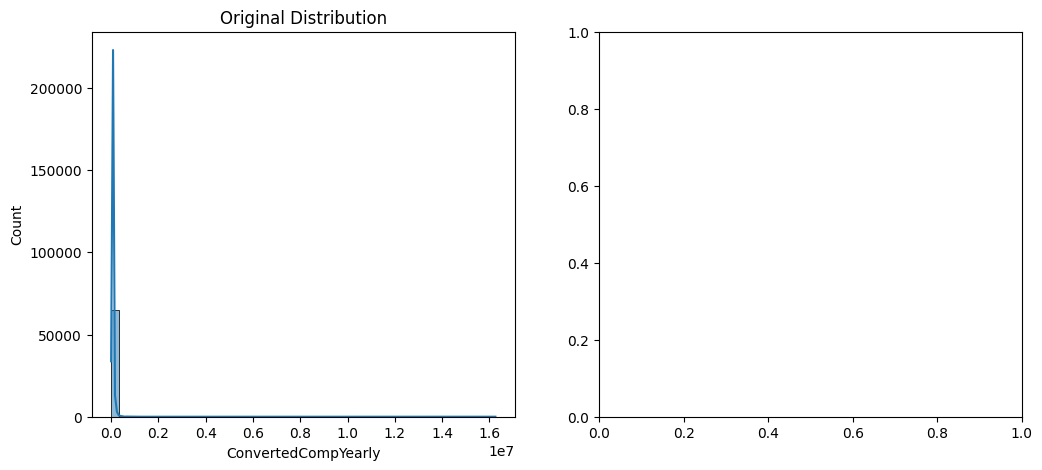

In [21]:
## Write your code here
import numpy as np

In [23]:
## Write your code here
# Nếu có giá trị 0 trong dữ liệu, dùng log1p:
df['ConvertedCompYearly_Log'] = np.log1p(df['ConvertedCompYearly'])

# Nếu chắc chắn không có 0:
# df['ConvertedCompYearly_Log'] = np.log(df['ConvertedCompYearly'])

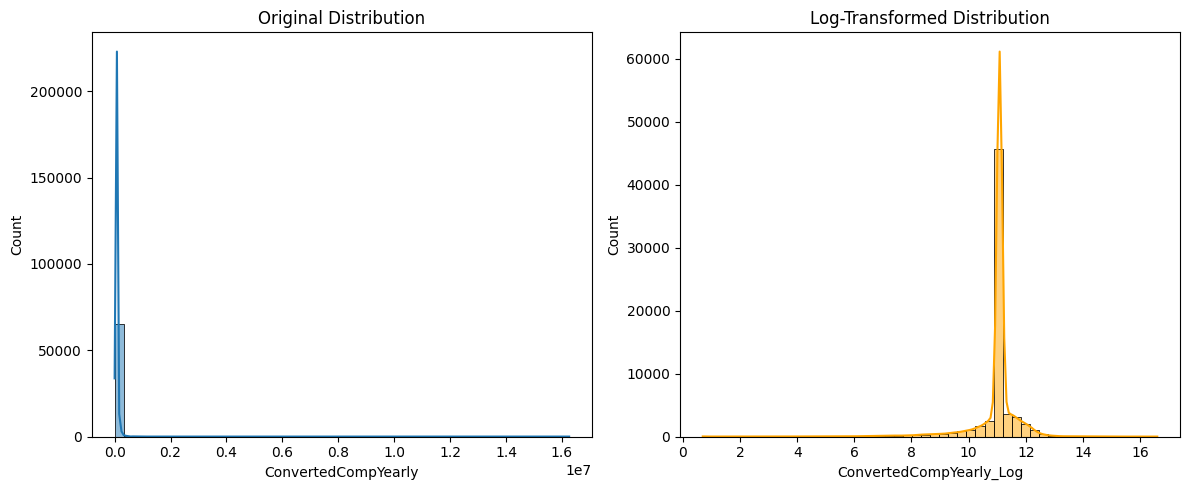

In [24]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Trước khi log
plt.subplot(1,2,1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Original Distribution')

# Sau khi log-transform
plt.subplot(1,2,2)
sns.histplot(df['ConvertedCompYearly_Log'], bins=50, kde=True, color='orange')
plt.title('Log-Transformed Distribution')

plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [29]:
## Write your code here
# Số lượng giá trị thiếu trên mỗi cột
missing_values = df['YearsCodePro'].isnull().sum()

# Tính tỷ lệ thiếu (%)
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

np.float64(21.130247413542797)

In [30]:
def clean_years_code_pro(value):
    if pd.isnull(value):
        return np.nan
    elif isinstance(value, str):
        value = value.strip().lower()
        if "less" in value:
            return 0  # hoặc 0.5 nếu bạn muốn phản ánh khoảng gần 1 năm
        elif "more" in value:
            return 51  # hoặc 50, 55 tùy vào max bạn chấp nhận
        else:
            try:
                return int(float(value))
            except:
                return np.nan
    else:
        return int(value)

# Áp dụng làm sạch dữ liệu
df['YearsCodePro_Clean'] = df['YearsCodePro'].apply(clean_years_code_pro)

# Điền missing values bằng median hoặc một số cố định (ví dụ: 0)
df['YearsCodePro_Clean'] = df['YearsCodePro_Clean'].fillna(df['YearsCodePro_Clean'].median()).astype(int)

# Kiểm tra kết quả
df[['YearsCodePro', 'YearsCodePro_Clean']].head()

,YearsCodePro,YearsCodePro_Clean
0,NaN,7
1,17,17
2,27,27
3,NaN,7
4,NaN,7


In [31]:
## Write your code here
def categorize_experience(years):
    try:
        # Nếu là số (ví dụ: "3")
        years = float(years)
        if years <= 1:
            return "Beginner"
        elif years <= 5:
            return "Intermediate"
        elif years <= 10:
            return "Advanced"
        elif years <= 20:
            return "Expert"
        else:
            return "Veteran"
    except:
        # Nếu là chuỗi không rõ (ví dụ: "Less than 1 year", "More than 50 years")
        if "less" in str(years).lower():
            return "Beginner"
        elif "more" in str(years).lower():
            return "Veteran"
        else:
            return "Unknown"

# Tạo cột mới
df['ExperienceLevel'] = df['YearsCodePro_Clean'].apply(categorize_experience)

# Kiểm tra kết quả
df[['YearsCodePro_Clean', 'ExperienceLevel']].head()

,YearsCodePro_Clean,ExperienceLevel
0,7,Advanced
1,17,Expert
2,27,Veteran
3,7,Advanced
4,7,Advanced


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
